In [1]:
# ruff: noqa: E402
import sys
import os
from pathlib import Path

# 1. Define Paths
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(project_root)

# 2. Import Libraries
from src import plots, io

# 3. Define File Paths
DATA = Path("..") / "data"

FILE_SWEEP_SRC = DATA / "continuous" / "src_sweep_20260125_124443.npz"
FILE_SWEEP_DUT = DATA / "continuous" / "llama_sweep_20260125_125640.npz"
FILE_TRI_SRC = DATA / "burst" / "src_triangle_100Hz_20260125_124201.npz"
FILE_TRI_DUT = DATA / "burst" / "llama_triangle_100Hz_20260125_125545.npz"
FILE_SINE_DUT = DATA / "burst" / "llama_sine_1kHz_20260125_125702.npz"

## 1. Methodology: System Transfer Function
To characterize the frequency response, we treat the Red Llama as a Black Box system $H(f)$. Using the Log Sine Sweep ($20\text{Hz} - 20\text{kHz}$), we can derive the magnitude response by comparing the spectral density of the output $Y(f)$ against the known input $X(f)$.
The Magnitude Response in decibels is calculated as:

$$|H(f)|_{dB} = 20 \log_{10}\left( \frac{|Y(f)|}{|X(f)|} \right)$$
This reveals the "voicing" of the circuit—specifically looking for the corner frequencies of the coupling capacitors (High-Pass filters) and the Miller capacitance of the CMOS inverters (Low-Pass filters).

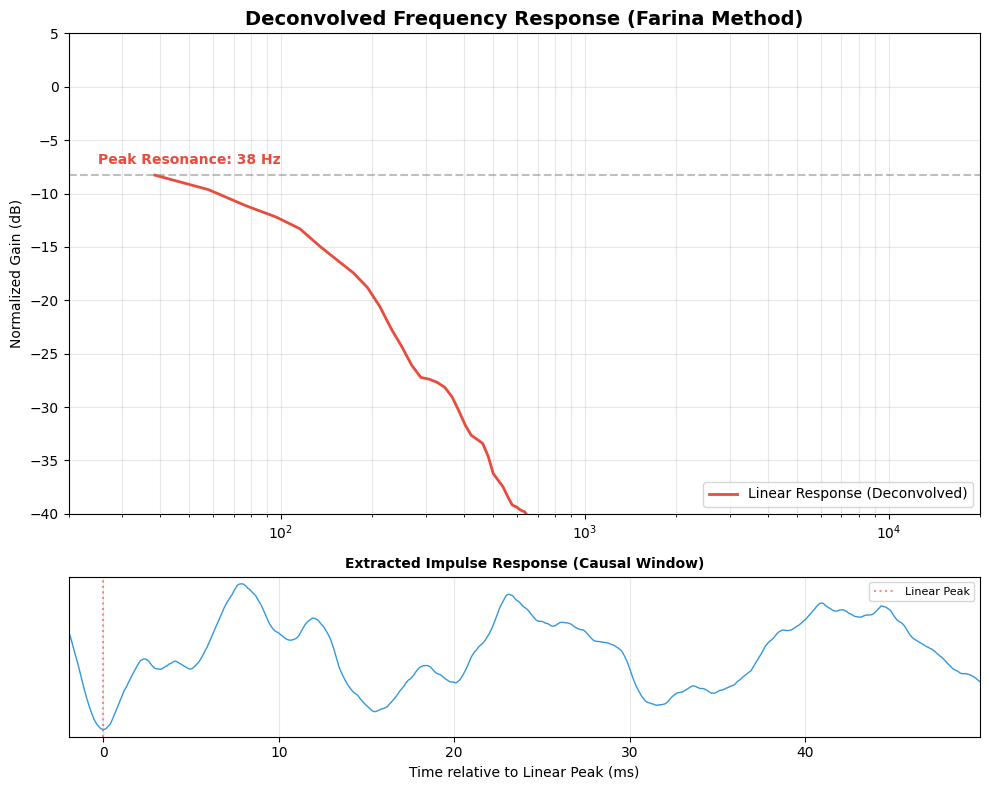

In [2]:
# 1. Load Data
sig_src, fs_src = io.load_signal(FILE_SWEEP_SRC)
sig_dut, fs_dut = io.load_signal(FILE_SWEEP_DUT)

# 2. Plot (Pass the arrays, not the filenames)
# We assume fs is consistent, so we use fs_src
plots.plot_bode_response(sig_src, sig_dut, fs_src)

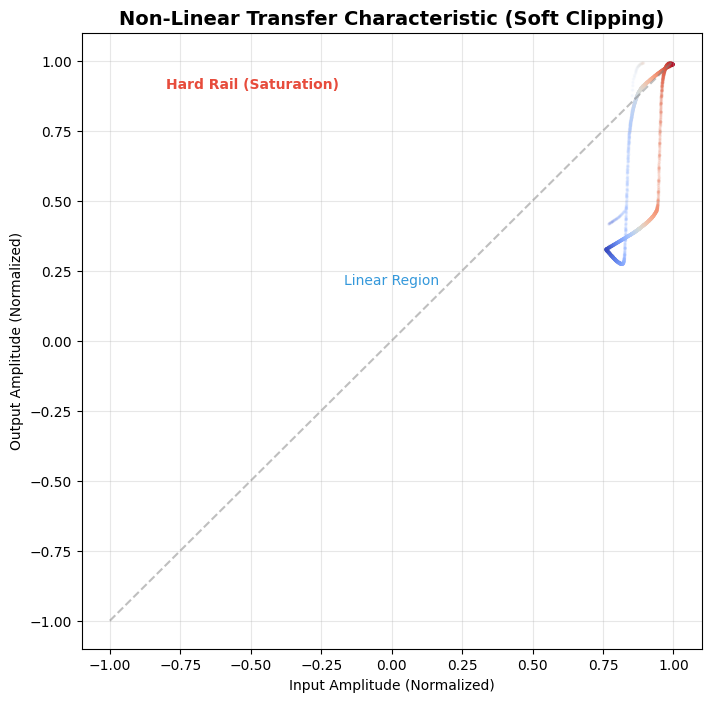

In [3]:
# 1. Load Data
sig_tri_src, _ = io.load_signal(FILE_TRI_SRC)
sig_tri_dut, _ = io.load_signal(FILE_TRI_DUT)

# 2. Plot
plots.plot_transfer_curve(sig_tri_src, sig_tri_dut)

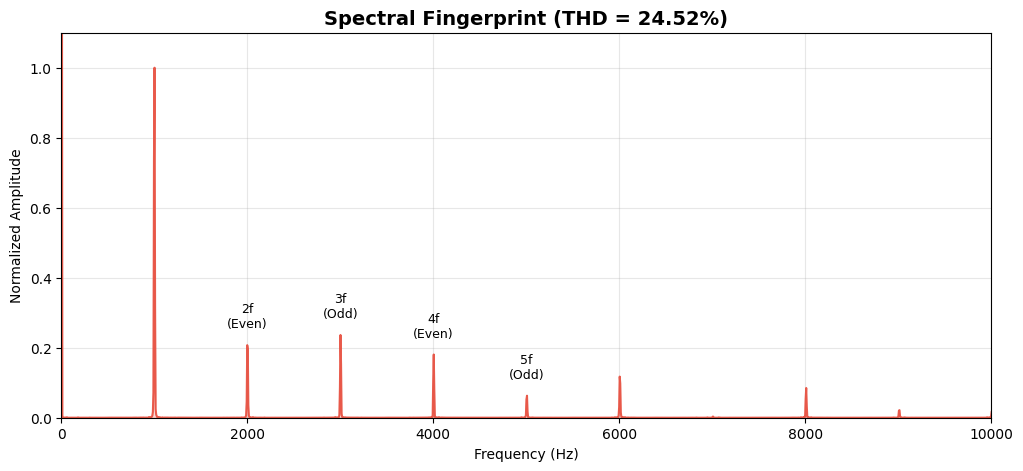

In [4]:
# 1. Load Data
sig_sine, fs_sine = io.load_signal(FILE_SINE_DUT)

# 2. Plot (Note the function name change)
plots.plot_thd_fingerprint(sig_sine, fs=fs_sine)